In [1]:
import pandas as pd
import os
from glob import glob

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import warnings
warnings.filterwarnings('ignore') #to ignore some warnings which might come

## 🧪 Step 1: Load All Ticker Data into a Single DataFrame

In [2]:

data_dir = '../Output/formatted_data_1h'
all_files = glob(os.path.join(data_dir, '*.csv'))

df_list = []

In [3]:
for file in all_files:
    try:
        temp_df = pd.read_csv(file, sep='\t')
        ticker = os.path.basename(file).split('_')[0]
        temp_df['Ticker'] = ticker
        temp_df['Gmt time'] = pd.to_datetime(temp_df['Gmt time'], format='%d.%m.%Y %H:%M:%S.000')
        df_list.append(temp_df)
    except Exception as e:
        print(f"Failed to load {file}: {e}")



In [4]:
df_all = pd.concat(df_list, ignore_index=True)
df_all.sort_values(['Ticker', 'Gmt time'], inplace=True)
df_all.head()


,Gmt time,Open,High,Low,Close,Volume,Ticker
136817,2023-08-01 13:30:00,196.235,196.73000,195.28000,195.47501,9552101,AAPL
136818,2023-08-01 14:30:00,195.480,196.17999,195.33000,196.11501,4389743,AAPL
136819,2023-08-01 15:30:00,196.110,196.14500,195.41000,195.49730,2991657,AAPL
136820,2023-08-01 16:30:00,195.480,196.03999,195.35001,195.72951,2445951,AAPL
136821,2023-08-01 17:30:00,195.735,196.27010,195.53000,196.05330,3075209,AAPL


## 🔍 Step 2: Basic Info and Descriptive Statistics

In [7]:
# Overview
display(df_all.info())

<class 'pandas.core.frame.DataFrame'>
Index: 989296 entries, 136817 to 403583
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Gmt time  989296 non-null  datetime64[ns]
 1   Open      989296 non-null  float64       
 2   High      989296 non-null  float64       
 3   Low       989296 non-null  float64       
 4   Close     989296 non-null  float64       
 5   Volume    989296 non-null  int64         
 6   Ticker    989296 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 60.4+ MB


None

In [8]:
# Descriptive stats
df_all.describe()

,Gmt time,Open,High,Low,Close,Volume
count,989296,989296.000000,989296.000000,989296.000000,989296.000000,9.892960e+05
mean,2024-07-13 20:28:08.324223232,169.036134,169.666490,168.398357,169.036111,8.665234e+05
min,2023-08-01 13:30:00,0.401550,0.407950,0.393500,0.401600,0.000000e+00
25%,2024-01-22 20:30:00,57.195000,57.410000,56.960000,57.190000,1.316008e+05
50%,2024-07-15 18:30:00,105.296800,105.696500,104.900000,105.290000,2.867260e+05
75%,2025-01-03 20:30:00,201.619700,202.389917,200.845000,201.610000,6.905198e+05
max,2025-06-27 19:30:00,3910.000000,3916.810060,3882.050050,3888.820070,2.437944e+08
std,NaN,235.086511,235.856783,234.304729,235.087876,2.705792e+06


## 📊 Step 3: Visualize Closing Prices

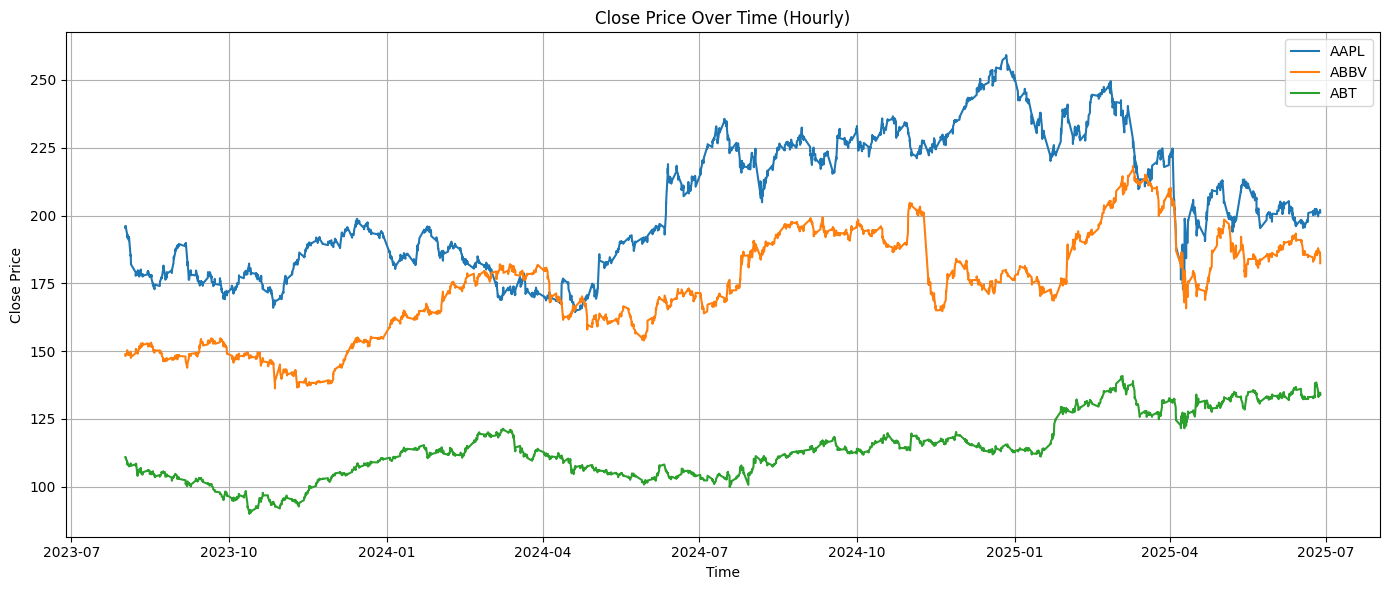

In [10]:
# Plot 3 example tickers
example_tickers = df_all['Ticker'].unique()[:3]

plt.figure(figsize=(14, 6))
for ticker in example_tickers:
    sub_df = df_all[df_all['Ticker'] == ticker]
    plt.plot(sub_df['Gmt time'], sub_df['Close'], label=ticker)

plt.title("Close Price Over Time (Hourly)")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 📉 Step 4: Correlation Between Tickers

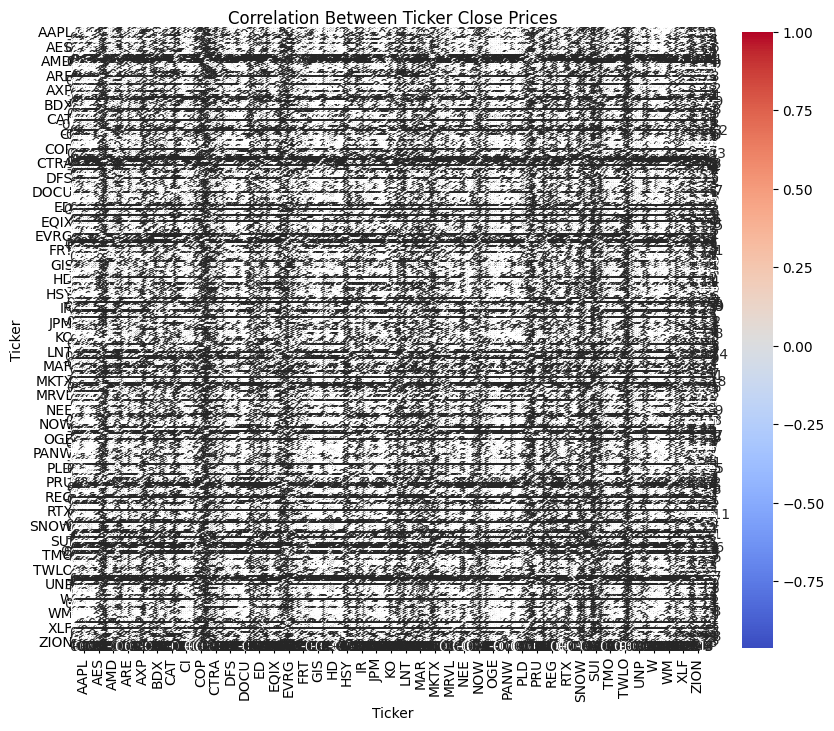

In [11]:
# Pivot to make tickers columns
pivot_close = df_all.pivot(index='Gmt time', columns='Ticker', values='Close')

# Correlation matrix
corr_matrix = pivot_close.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Ticker Close Prices")
plt.show()


## 🕵️ Step 5: Volume and Volatility Analysis

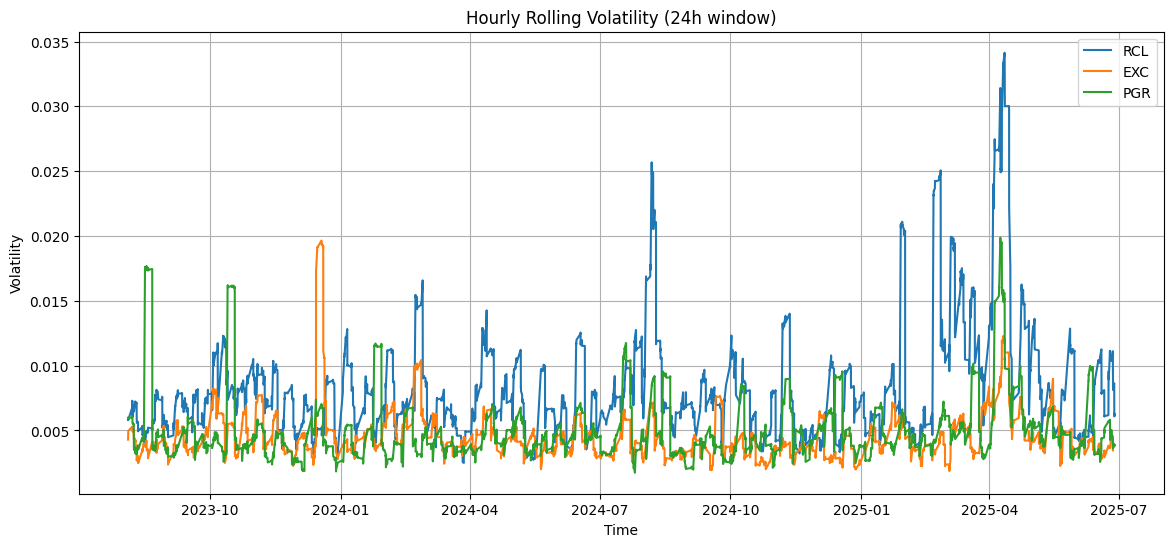

In [14]:
# Add hourly return (percent)
df_all['Return'] = df_all.groupby('Ticker')['Close'].pct_change()

# Plot volatility for top 3 tickers
top_tickers = df_all['Ticker'].value_counts().head(3).index

plt.figure(figsize=(14, 6))
for ticker in top_tickers:
    sub_df = df_all[df_all['Ticker'] == ticker]
    sub_df['Volatility'] = sub_df['Return'].rolling(24).std()  # 24 hours = 1 day
    plt.plot(sub_df['Gmt time'], sub_df['Volatility'], label=ticker)

plt.title("Hourly Rolling Volatility (24h window)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()


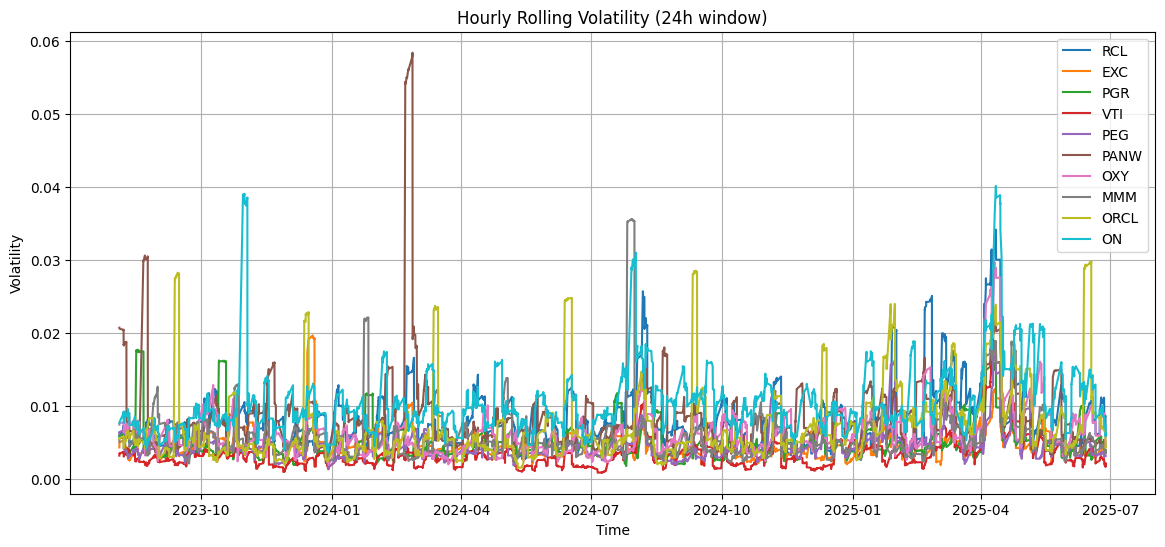

In [16]:
# Add hourly return (percent)
df_all['Return'] = df_all.groupby('Ticker')['Close'].pct_change()

# Plot volatility for top 10 tickers
top_tickers = df_all['Ticker'].value_counts().head(10).index

plt.figure(figsize=(14, 6))
for ticker in top_tickers:
    sub_df = df_all[df_all['Ticker'] == ticker]
    sub_df['Volatility'] = sub_df['Return'].rolling(24).std()  # 24 hours = 1 day
    plt.plot(sub_df['Gmt time'], sub_df['Volatility'], label=ticker)

plt.title("Hourly Rolling Volatility (24h window)")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()


## Additional EDA Snippets for Your Stock Dataset

### 1. Summary Statistics per Ticker

In [17]:
# Aggregate stats by ticker
ticker_summary = df_all.groupby('Ticker').agg({
    'Open': ['mean', 'std', 'min', 'max'],
    'High': ['mean', 'std'],
    'Low': ['mean', 'std'],
    'Close': ['mean', 'std'],
    'Volume': ['mean', 'sum'],
    'Return': ['mean', 'std']
})

# Clean multi-index columns
ticker_summary.columns = ['_'.join(col) for col in ticker_summary.columns]
ticker_summary = ticker_summary.reset_index()
ticker_summary.head()


,Ticker,Open_mean,Open_std,Open_min,Open_max,High_mean,High_std,Low_mean,Low_std,Close_mean,Close_std,Volume_mean,Volume_sum,Return_mean,Return_std
0,AAPL,203.939983,24.067602,164.37000,259.12000,204.647861,24.153209,203.253405,23.976910,203.964005,24.075310,6.388851e+06,21319596295,0.000030,0.006516
1,ABBV,173.928273,18.778689,136.19000,218.22000,174.491347,18.868004,173.341622,18.664912,173.933711,18.774180,5.770215e+05,1925520895,0.000078,0.005824
2,ABT,113.725548,11.454566,89.88000,141.00000,114.062334,11.516159,113.393446,11.408251,113.735299,11.465057,6.123003e+05,2043246174,0.000069,0.004854
3,ADBE,502.204091,70.368777,335.51999,637.34497,504.131141,70.530782,500.280444,70.187238,502.201140,70.389022,3.720434e+05,1241508676,-0.000069,0.008312
4,ADI,205.336316,20.894707,155.17000,245.94000,206.182916,20.942528,204.476944,20.810769,205.335092,20.885818,3.507339e+05,1170398878,0.000083,0.007755


### 2. Daily Aggregation (OHLC) and Volume

In [18]:
# Create a date column (without time)
df_all['Date'] = df_all['Gmt time'].dt.date

# Daily OHLC per ticker
daily_ohlc = df_all.groupby(['Ticker', 'Date']).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

daily_ohlc.head()


,Ticker,Date,Open,High,Low,Close,Volume
0,AAPL,2023-08-01,196.23500,196.73000,195.28000,195.60001,29127429
1,AAPL,2023-08-02,195.03999,195.17999,191.85069,192.59000,39393120
2,AAPL,2023-08-03,192.00000,192.37000,190.84000,191.00990,43593604
3,AAPL,2023-08-04,184.62500,187.38000,181.92000,182.00000,103303839
4,AAPL,2023-08-07,182.13000,183.13000,177.35001,178.80000,88548061


### 3. Plot Daily Closing Price with Moving Averages

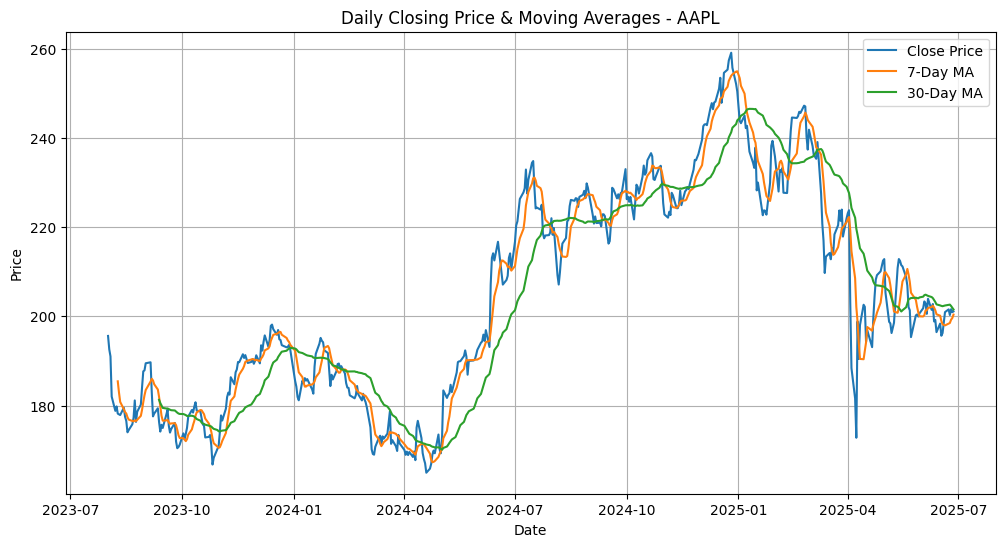

In [20]:
ticker = 'AAPL'  
df_ticker = daily_ohlc[daily_ohlc['Ticker'] == ticker]

# Calculate moving averages
df_ticker['MA_7'] = df_ticker['Close'].rolling(window=7).mean()
df_ticker['MA_30'] = df_ticker['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df_ticker['Date'], df_ticker['Close'], label='Close Price')
plt.plot(df_ticker['Date'], df_ticker['MA_7'], label='7-Day MA')
plt.plot(df_ticker['Date'], df_ticker['MA_30'], label='30-Day MA')
plt.title(f'Daily Closing Price & Moving Averages - {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


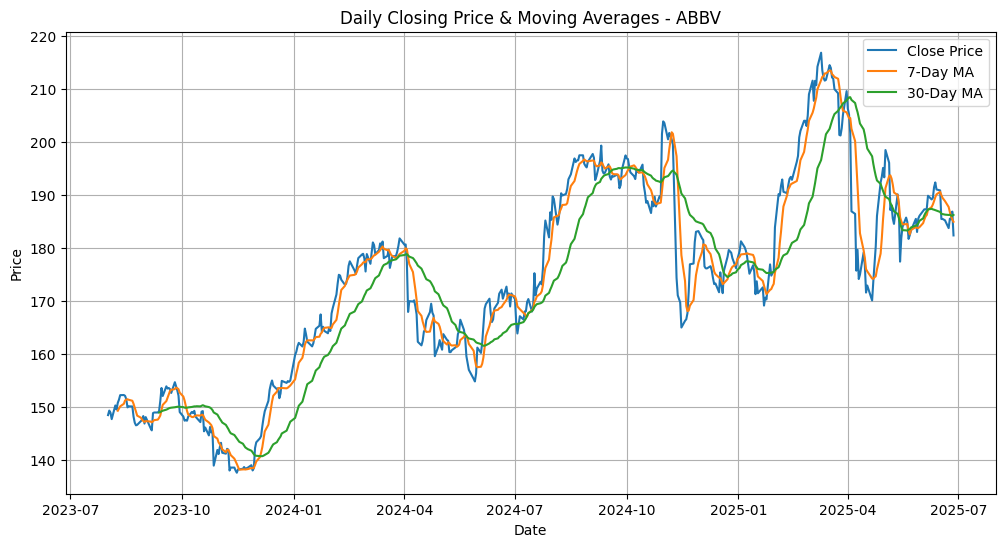

In [21]:
ticker = 'ABBV'  
df_ticker = daily_ohlc[daily_ohlc['Ticker'] == ticker]

# Calculate moving averages
df_ticker['MA_7'] = df_ticker['Close'].rolling(window=7).mean()
df_ticker['MA_30'] = df_ticker['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df_ticker['Date'], df_ticker['Close'], label='Close Price')
plt.plot(df_ticker['Date'], df_ticker['MA_7'], label='7-Day MA')
plt.plot(df_ticker['Date'], df_ticker['MA_30'], label='30-Day MA')
plt.title(f'Daily Closing Price & Moving Averages - {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


### 4. Distribution of Returns

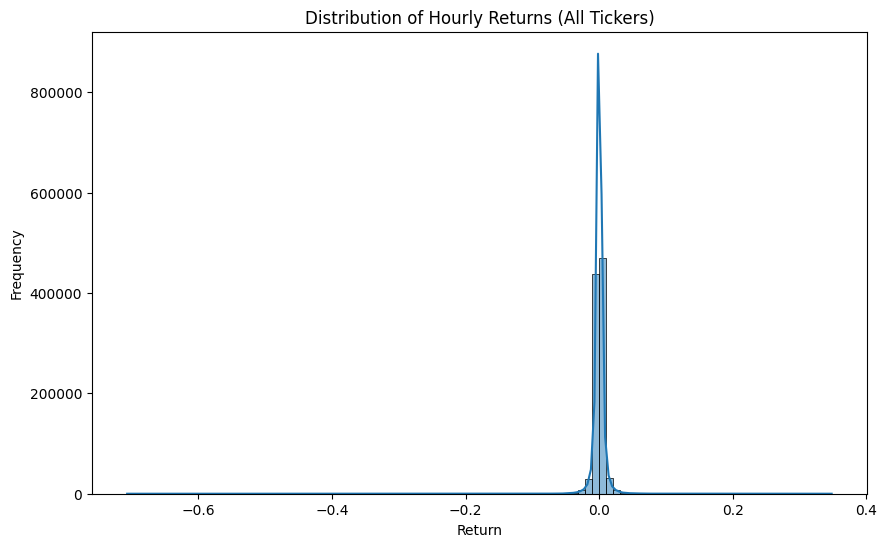

In [22]:

plt.figure(figsize=(10,6))
sns.histplot(df_all['Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Hourly Returns (All Tickers)')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()


### 5. Identify Top Volatile Stocks

In [24]:
volatility = df_all.groupby('Ticker')['Return'].std().sort_values(ascending=False)
print("Top 10 Most Volatile Tickers (Hourly Returns):")
display(volatility.head(10))

Top 10 Most Volatile Tickers (Hourly Returns):


Ticker
WOLF    0.030499
LB      0.019344
FSLY    0.018274
W       0.018157
RH      0.017682
PLTR    0.016591
LYFT    0.015663
MRNA    0.015490
KSS     0.015224
TSLA    0.014563
Name: Return, dtype: float64

### 6. Check Missing Data Per Ticker

In [25]:
missing_counts = df_all.groupby('Ticker')['Close'].apply(lambda x: x.isna().sum())
print("Missing Close values per ticker:")
print(missing_counts[missing_counts > 0])

Missing Close values per ticker:
Series([], Name: Close, dtype: int64)


### 7. Plot Volume vs Close Price Scatter

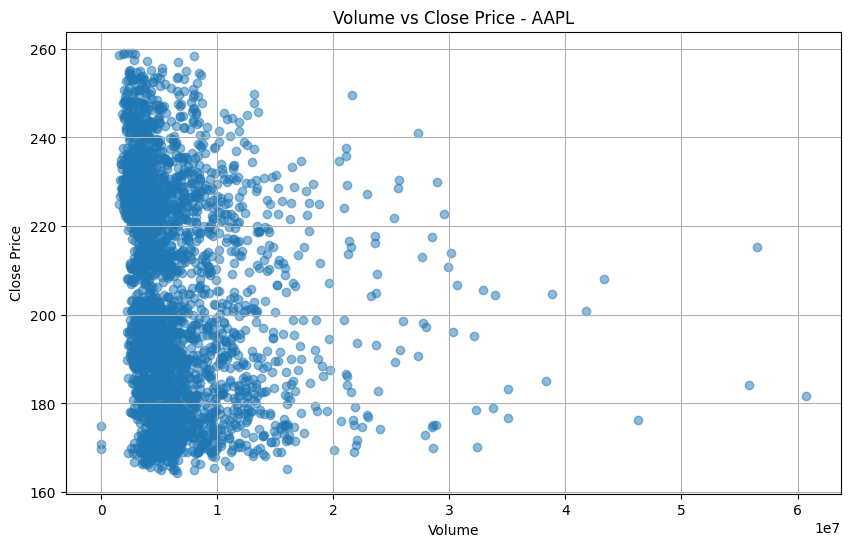

In [26]:
ticker = 'AAPL'
df_ticker = df_all[df_all['Ticker'] == ticker]

plt.figure(figsize=(10,6))
plt.scatter(df_ticker['Volume'], df_ticker['Close'], alpha=0.5)
plt.title(f'Volume vs Close Price - {ticker}')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


### 8. Hourly Price Change Heatmap (Across Day Hours)

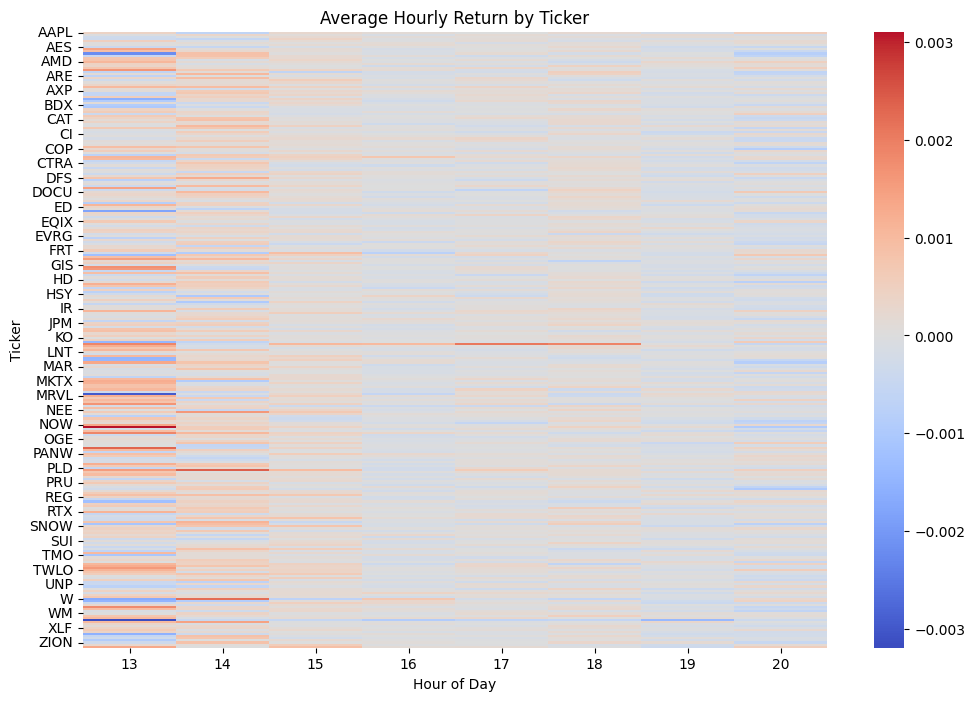

In [28]:
# Extract hour from timestamp
df_all['Hour'] = df_all['Gmt time'].dt.hour

# Calculate average hourly return per ticker
hourly_returns = df_all.groupby(['Ticker', 'Hour'])['Return'].mean().unstack()

import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(hourly_returns, cmap='coolwarm', center=0)
plt.title('Average Hourly Return by Ticker')
plt.xlabel('Hour of Day')
plt.ylabel('Ticker')
plt.show()


### 9. Rolling Correlation Between Two Stocks

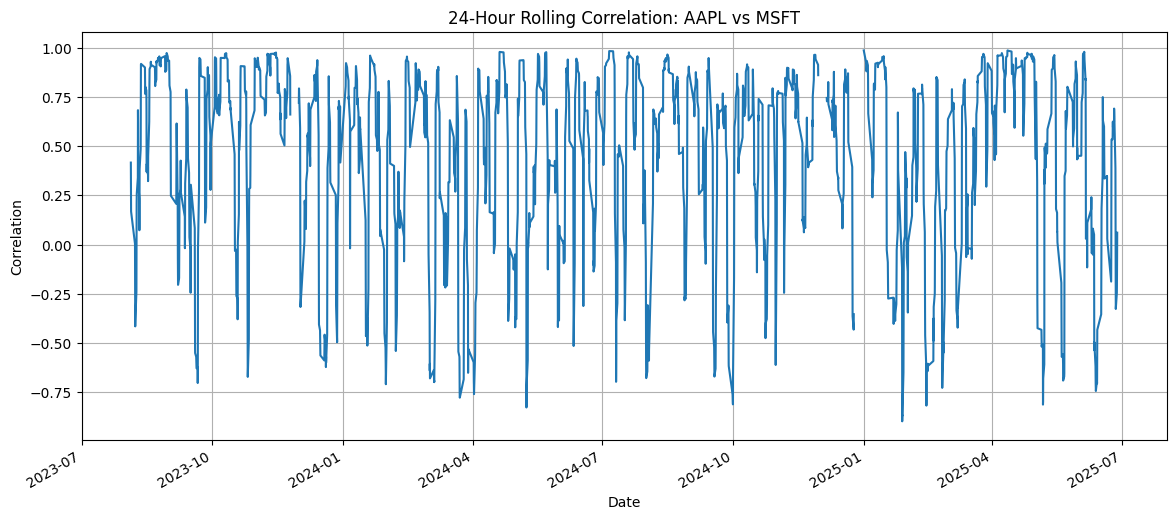

In [29]:
ticker1 = 'AAPL'
ticker2 = 'MSFT'

pivot_close = df_all.pivot(index='Gmt time', columns='Ticker', values='Close')
rolling_corr = pivot_close[ticker1].rolling(window=24).corr(pivot_close[ticker2])

plt.figure(figsize=(14,6))
rolling_corr.plot()
plt.title(f'24-Hour Rolling Correlation: {ticker1} vs {ticker2}')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


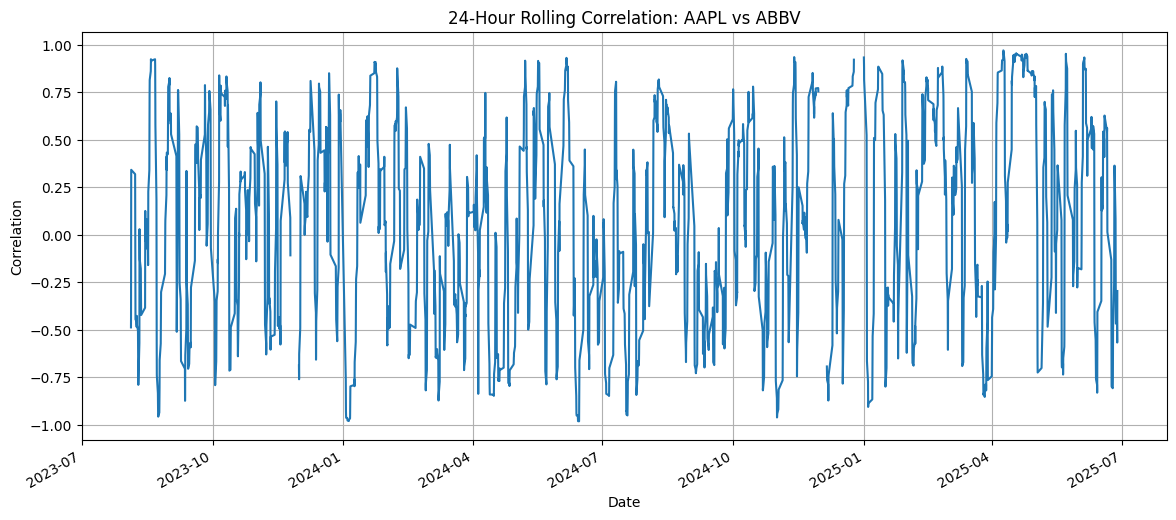

In [30]:
ticker1 = 'AAPL'
ticker2 = 'ABBV'

pivot_close = df_all.pivot(index='Gmt time', columns='Ticker', values='Close')
rolling_corr = pivot_close[ticker1].rolling(window=24).corr(pivot_close[ticker2])

plt.figure(figsize=(14,6))
rolling_corr.plot()
plt.title(f'24-Hour Rolling Correlation: {ticker1} vs {ticker2}')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


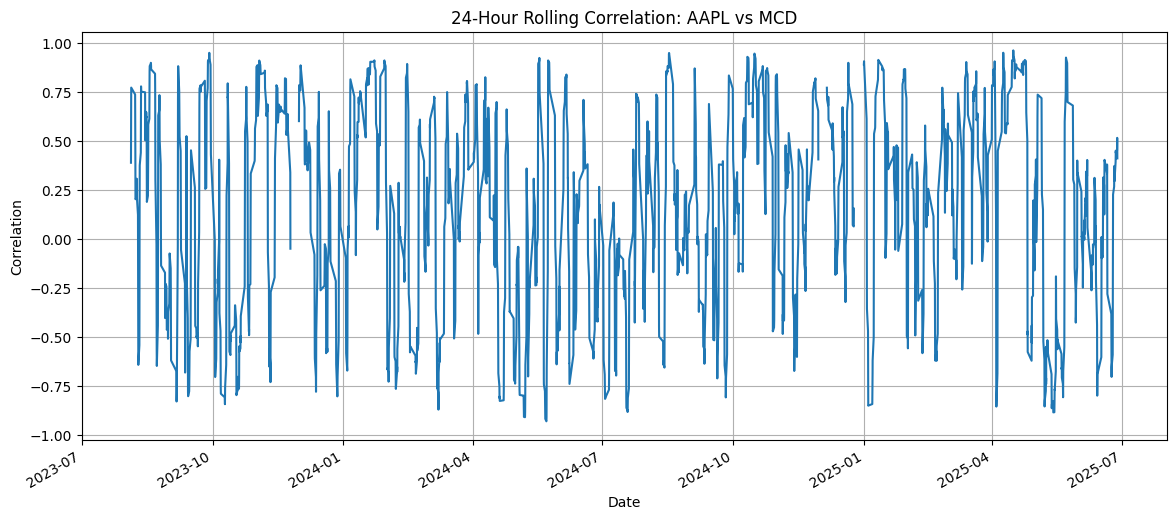

In [31]:
ticker1 = 'AAPL'
ticker2 = 'MCD'

pivot_close = df_all.pivot(index='Gmt time', columns='Ticker', values='Close')
rolling_corr = pivot_close[ticker1].rolling(window=24).corr(pivot_close[ticker2])

plt.figure(figsize=(14,6))
rolling_corr.plot()
plt.title(f'24-Hour Rolling Correlation: {ticker1} vs {ticker2}')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()


### ✅ 10. Intraday Seasonality Heatmap

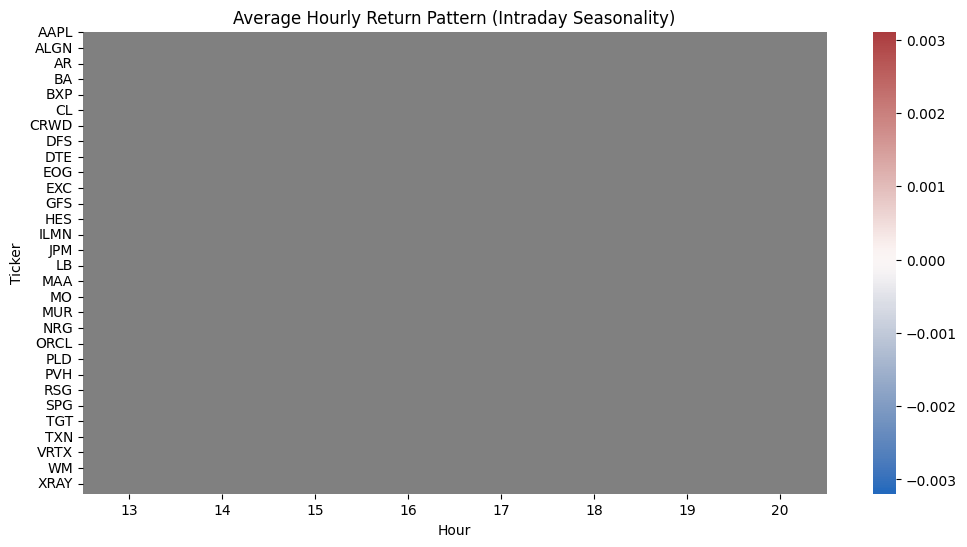

In [32]:
df_all['Hour'] = df_all['Gmt time'].dt.hour
df_all['Day'] = df_all['Gmt time'].dt.date

intraday_avg = df_all.groupby(['Ticker', 'Hour'])['Return'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(intraday_avg, cmap='vlag', center=0, linewidths=0.1, linecolor='gray')
plt.title('Average Hourly Return Pattern (Intraday Seasonality)')
plt.xlabel('Hour')
plt.ylabel('Ticker')
plt.show()


### ✅ 11. Gap Detection Between Sessions

In [38]:
# Create gap column
daily_ohlc['Prev_Close'] = daily_ohlc.groupby('Ticker')['Close'].shift(1)
daily_ohlc['Gap'] = daily_ohlc['Open'] - daily_ohlc['Prev_Close']


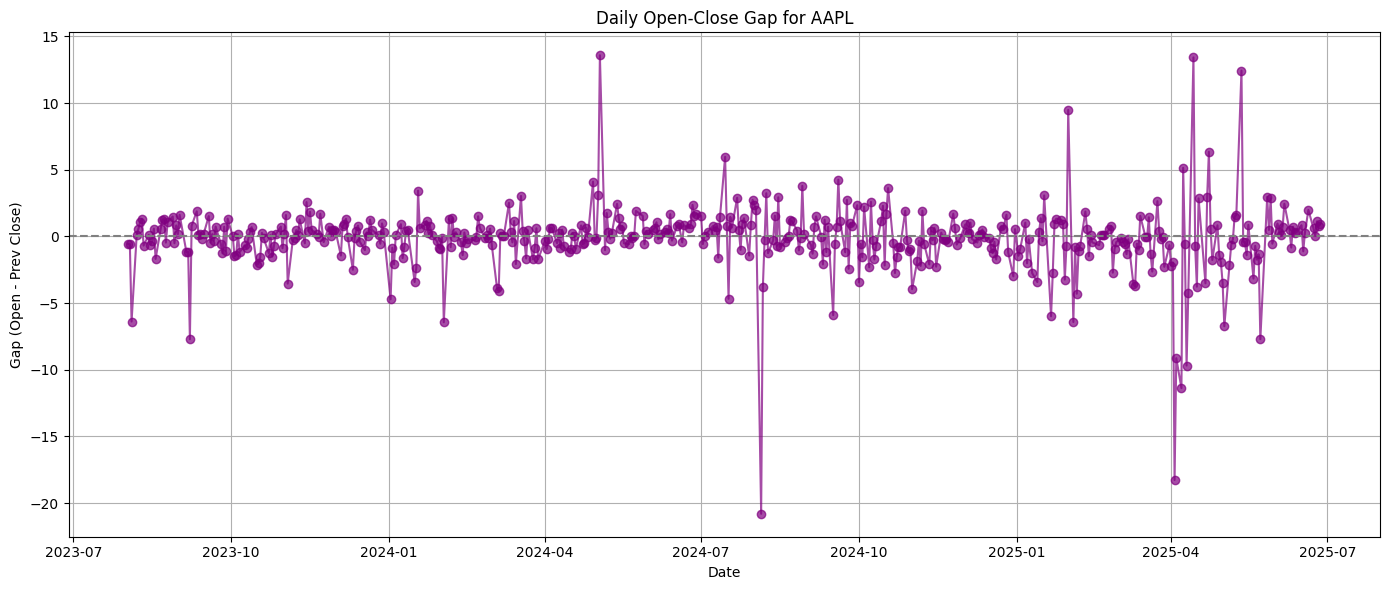

In [39]:
ticker = 'AAPL'  # Choose ticker
df_gap = daily_ohlc[daily_ohlc['Ticker'] == ticker].copy()

plt.figure(figsize=(14, 6))
plt.plot(df_gap['Date'], df_gap['Gap'], marker='o', linestyle='-', color='purple', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.title(f'Daily Open-Close Gap for {ticker}')
plt.xlabel('Date')
plt.ylabel('Gap (Open - Prev Close)')
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ 12. Volume Spike Alerts

In [40]:
df_all['Volume_MA7'] = df_all.groupby('Ticker')['Volume'].transform(lambda x: x.rolling(7).mean())
df_all['Volume_Spike'] = df_all['Volume'] > 3 * df_all['Volume_MA7']


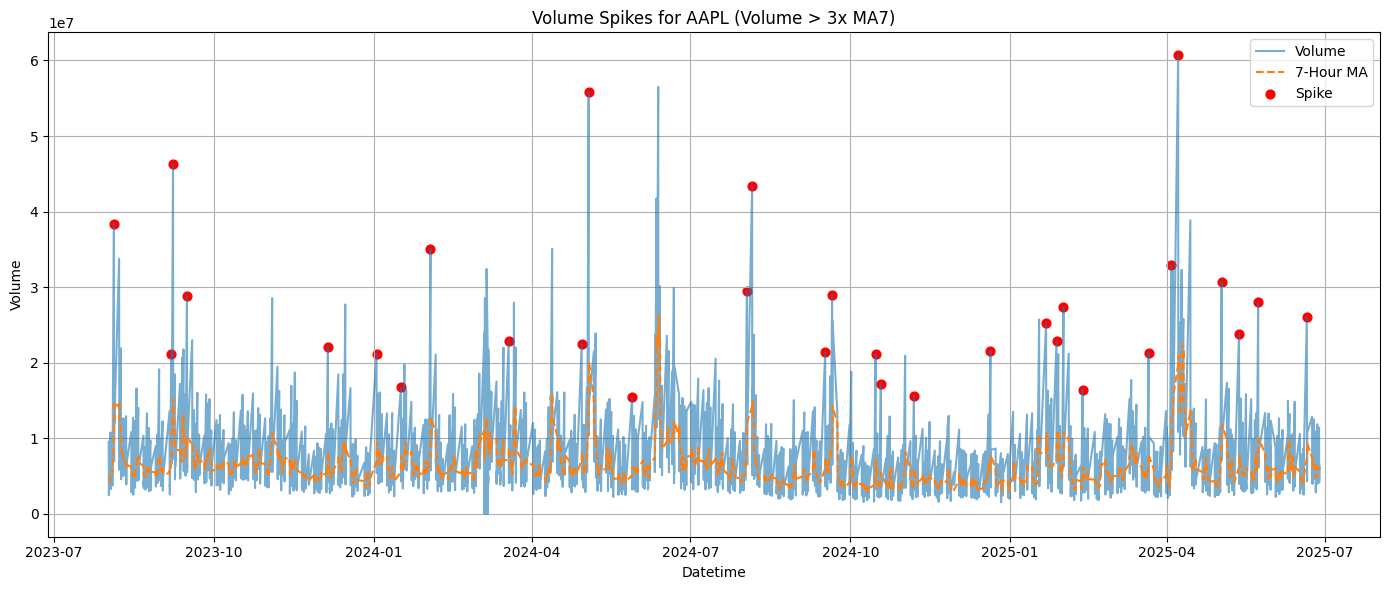

In [41]:
ticker = 'AAPL'
df_spike = df_all[df_all['Ticker'] == ticker].copy()

plt.figure(figsize=(14, 6))
plt.plot(df_spike['Gmt time'], df_spike['Volume'], label='Volume', alpha=0.6)
plt.plot(df_spike['Gmt time'], df_spike['Volume_MA7'], label='7-Hour MA', linestyle='--')

# Highlight spike points
spike_points = df_spike[df_spike['Volume_Spike']]
plt.scatter(spike_points['Gmt time'], spike_points['Volume'], color='red', label='Spike', s=40)

plt.title(f'Volume Spikes for {ticker} (Volume > 3x MA7)')
plt.xlabel('Datetime')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ 13. Price Range (High - Low) vs Volume Scatter

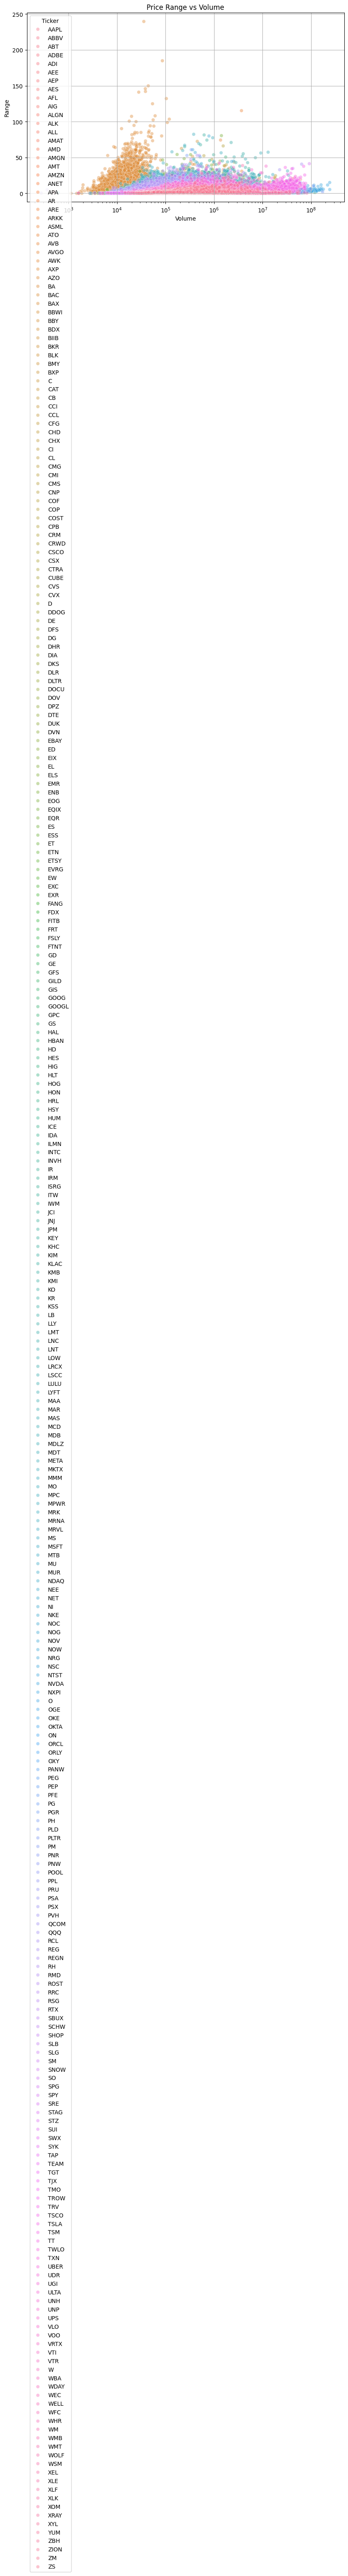

In [36]:
df_all['Range'] = df_all['High'] - df_all['Low']

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_all, x='Volume', y='Range', hue='Ticker', alpha=0.4)
plt.title("Price Range vs Volume")
plt.xscale('log')
plt.grid(True)
plt.show()


done for today preprocessing 
